In [2]:
import sys
sys.path.append("../lib")
import imageio.v2 as imageio
import os
import shutil
import em2d as zpic
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Video
matplotlib.rcParams["figure.figsize"] = (12, 8)

In [4]:
box = [12.0, 15.0]
# nx = [400, 1000]
dt = 0.01
ppc = [2,2]
# dt = 0.014
tmax = 18.1

#Simulation box
nx  = [ 360, 300 ]
# box = [ 20.0, 25.6 ]

electrons = zpic.Species( "electrons", -1.0, ppc,
                           density = zpic.Density( type = "uniform", n = 1 ) )

protons = zpic.Species( "protons", 1840, ppc,
                           density = zpic.Density( type = "uniform", n = 1 ) )
sim = zpic.Simulation( nx, box, dt, species=[electrons, protons] )

In [5]:
sim.add_laser( zpic.Laser( type = "gaussian", start = 5, fwhm = 0.3, a0 = 56.5, omega0 = 3.3, 
                           W0 = 1.5, polarization = np.pi/2 ))
# sim.set_moving_window()

In [6]:
ezs = []
rhos = []
ezs_time = []
rhos_time = []
tdump = 100
times = ["6.00", "8.40", "12.00", "18.00"]
for t in range(int(tmax/dt)):
    print(f"t = {t*dt:.2f} of {tmax}", end = "\r")
    sim.iter()
    if t % tdump == 0:
        ezs.append(sim.emf.Ez)
        rhos.append(electrons.charge())
    if f"{t*dt:.2f}" in times:
        ezs_time.append(sim.emf.Ez)
        rhos_time.append(electrons.charge())

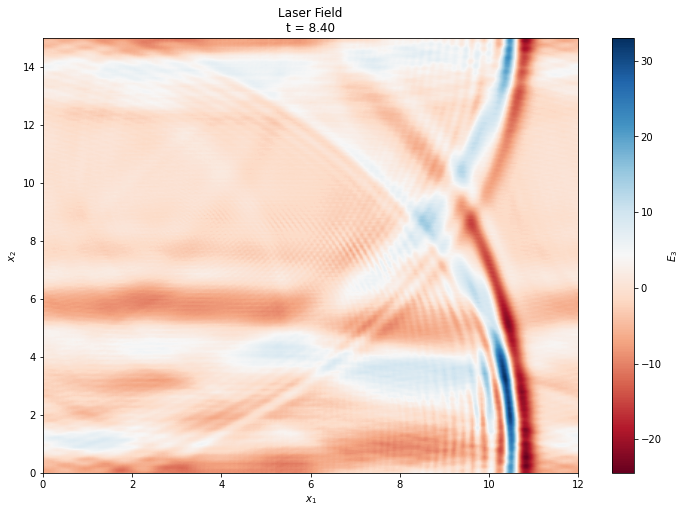

In [7]:
import matplotlib.pyplot as plt

boundary = [[0,sim.box[0]],[0,sim.box[1]]]

plt.imshow( ezs_time[0], interpolation = 'bilinear', origin = 'lower',
          extent = ( boundary[0][0], boundary[0][1], boundary[1][0], boundary[1][1] ),
          aspect = 'auto', cmap = 'RdBu')

plt.colorbar().set_label('$E_3$')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Laser Field\nt = {}".format(times[1]))

plt.show()

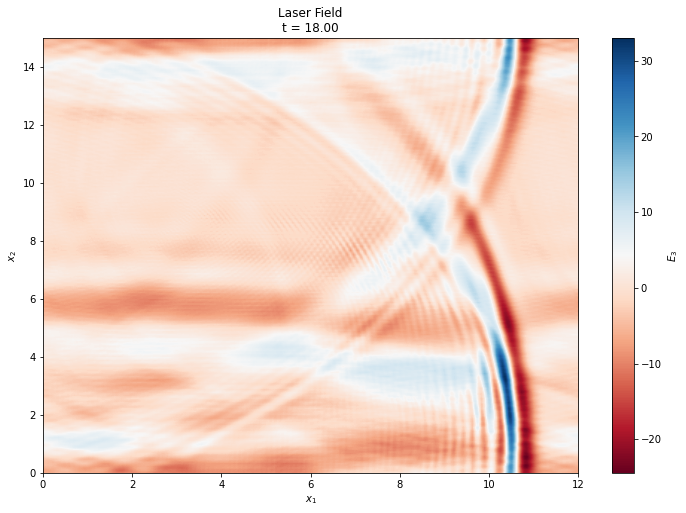

In [8]:
import matplotlib.pyplot as plt

boundary = [[0,sim.box[0]],[0,sim.box[1]]]

plt.imshow( ezs_time[3], interpolation = 'bilinear', origin = 'lower',
          extent = ( boundary[0][0], boundary[0][1], boundary[1][0], boundary[1][1] ),
          aspect = 'auto', cmap = 'RdBu')

plt.colorbar().set_label('$E_3$')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Laser Field\nt = {}".format(times[3]))

plt.show()

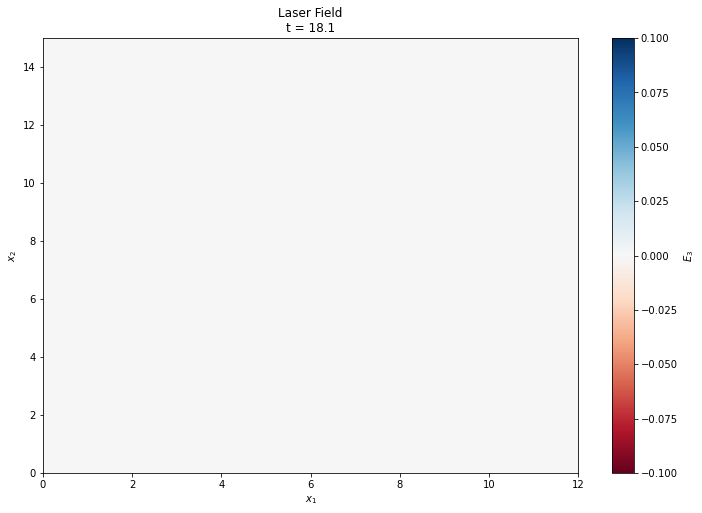

In [12]:
import matplotlib.pyplot as plt

boundary = [[0,sim.box[0]],[0,sim.box[1]]]

plt.imshow( ezs[-10], interpolation = 'bilinear', origin = 'lower',
          extent = ( boundary[0][0], boundary[0][1], boundary[1][0], boundary[1][1] ),
          aspect = 'auto', cmap = 'RdBu')

plt.colorbar().set_label('$E_3$')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Laser Field\nt = {:g}".format(sim.t))

plt.show()